# **Perceptron simple et multicouche avec Keras**

[Tensorflow](https://www.tensorflow.org/) = bibliothèque open-source développée par Google Brain qui implémente des méthodes d'apprentissage automatique basées sur le principe des réseaux de neurones profonds (deep learning). API Python est disponible donc exploitable directement mais moins "directe" que `Keras`.

[Keras](https://keras.io/) =  librairie  Python qui encapsule l'accès aux fonctions proposées par plusieurs librairies  de  machine  learning,  en  particulier  Tensorflow. Keras n'implémente donc pas les  méthodes mais sert d'interface

## **1. Classification binaire sur données simulées**

### **1.1 Génération des données**

1. Générer :
>- un vecteur aléatoire $X_1$ de 2000 observation à valeurs dans $[-0.5, 0.5]$
>- un vecteur aléatoire $X_2$ de 2000 observation à valeurs dans $[0, 1]$

In [1]:
import numpy as np
x1 = np.random.uniform(-0.5, 0.5, 2000)
x2 = np.random.uniform(0, 1, 2000)
x1, x2

(array([-0.30418993,  0.24684302, -0.23418137, ...,  0.21564937,
        -0.47772596,  0.12828457]),
 array([0.49510382, 0.76797097, 0.54030473, ..., 0.69050369, 0.7799795 ,
        0.36515258]))

2. Construire la variable label $Y$ de la manière suivante : $Y = 1$ si $0.1*X_2 > X_1²$ et 0 sinon

In [2]:
y = 1 * (x1**2 - 0.1 * x2 < 0)
y

array([0, 1, 0, ..., 1, 0, 1])

3. Regrouper les 2 variables prédictives $X_1$ $X_2$ et la variable expliquée $Y$ dans un dataframe puis représenter graphiquement les données

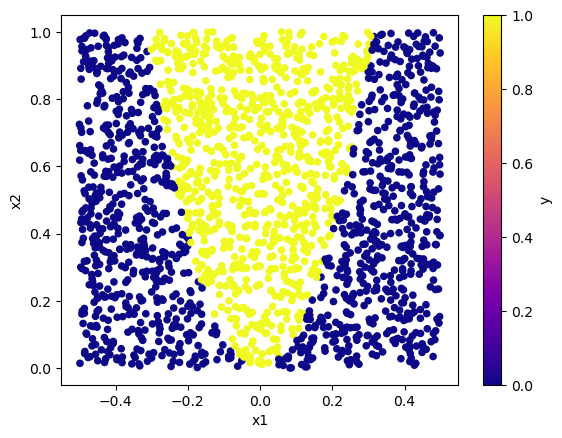

In [3]:
import pandas as pd
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
df.plot.scatter(x='x1', y='x2', c='y', cmap="plasma");

4. Découper les données en échantillons d'entraînement et test (avec 500 observations dans le testset)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df.y, test_size=500)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1500, 2), (500, 2), (1500,), (500,))

5. Calculer la répartition des classes (c'est-à-dire la proportion de labels valant "1") dans les échantillons test et train.  
Est-elle équilibrée ?  
Si ce n'est pas le cas, quel paramètre utiliser lors du `train_test_split` pour y remédier ?

In [5]:
np.mean(y), np.mean(y_train), np.mean(y_test)

(0.4265, 0.43133333333333335, 0.412)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df.y, test_size=500, stratify=y)
np.mean(y), np.mean(y_train), np.mean(y_test)

(0.4265, 0.4266666666666667, 0.426)

### **1.2 Perceptron simple**

1. Importer les classes `Sequential` et `Dense` depuis la librairie adaptée. C'est quoi ce truc ?

In [7]:
from keras.models import Sequential
from keras.layers import Dense

2024-01-17 09:58:31.766863: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2. Instancier le modèle `perceptron`

In [8]:
perceptron = Sequential()
type(perceptron)

2024-01-17 09:58:33.176050: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


keras.engine.sequential.Sequential

3. Ajouter une couche pour spécifier un perceptron simple en spécifiant les bons paramètres (on prendra une fonction d'activation sigmoïde).

In [9]:
perceptron.add(Dense(units=1, input_dim=2, activation='sigmoid'))

4. Récupérer la configuration de votre modèle. À quoi correspond le paramètre `use_bias` ?

In [10]:
perceptron.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 2),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 2),
    'units': 1,
    'activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

In [11]:
perceptron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


5. Ci-dessous une répresentation visuelle de notre réseau. Quelles sont les valeurs (théoriques) en entrée et en sortie du neurone de la couche de sortie ? Que représente la valeur en sortie ?
   
<img src="images/perceptron_simple.png">

en entrée : $$a_0+a_1*x_1+a_2*x_2$$

en sortie : $$\sigma(a_0+a_1*x_1+a_2*x_2) = \frac{1}{1+e^{-(a_0+a_1*x_1+a_2*x_2)}}$$

6. Spécifier les paramètres d'apprentissage avec la méthode `compile`. On utilisera l'entropie croisée binaire comme fonction de perte, Adam comme algorithme d'optimisation et l'accuracy comme métrique.

In [12]:
perceptron.compile(optimizer='adam', metrics='accuracy', loss='binary_crossentropy')

7. Entraîner le réseau afin d'en estimer les paramètres. Fixer notamment les hyperparamètres `epochs` et `batch_size`. Que sont-ils ?

In [13]:
perceptron.fit(X_train, y_train, batch_size=32, epochs=200)

Epoch 1/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.5080
Epoch 2/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.5527
Epoch 3/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6874 - accuracy: 0.5913
Epoch 4/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6849 - accuracy: 0.6027
Epoch 5/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6828 - accuracy: 0.6253
Epoch 6/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6810 - accuracy: 0.6200
Epoch 7/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.6107
Epoch 8/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6781 - accuracy: 0.6033
Epoch 9/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6769 - accuracy: 0.5953
Epoch 10/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6758 - accuracy: 0.5900
Epoch 11/

8. Récupérer les poids estimés et les replacer dans le réseau dessiné au dessus.

In [14]:
perceptron.get_weights()

[array([[-0.12942699],
        [ 1.8692021 ]], dtype=float32),
 array([-1.2433991], dtype=float32)]

9. Calculer les prédictions sur le testset avec `predict`. Que sont ces valeurs ?

In [15]:
y_pred = perceptron.predict(X_test)
y_pred[:10]

16/16 [==============================] - 0s 773us/step


array([[0.38001317],
       [0.50639915],
       [0.5195593 ],
       [0.44953004],
       [0.29669055],
       [0.42598423],
       [0.36331636],
       [0.24984378],
       [0.5352661 ],
       [0.4603204 ]], dtype=float32)

10. Récupérer à partir de ces valeurs prédites, la classe prédite

In [16]:
classes_pred = 1 * (y_pred > 0.5)
classes_pred[:10]

array([[0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]])

11. Présenter au moins 2 mesures d'évaluation du modèle (adapté au problème traité bien sûr !) en utilisant des fonctions de `sklearn.metrics`

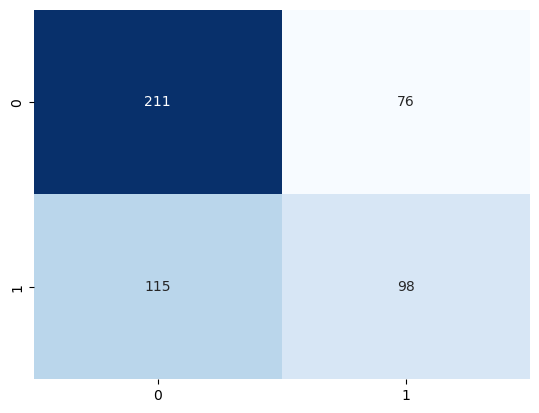

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, classes_pred), annot=True, cbar=False, cmap='Blues', fmt='d');

In [18]:
accuracy_score(y_test, classes_pred)

0.618

In [19]:
print(classification_report(y_test, classes_pred))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69       287
           1       0.56      0.46      0.51       213

    accuracy                           0.62       500
   macro avg       0.61      0.60      0.60       500
weighted avg       0.61      0.62      0.61       500



12. La même avec la méthode `evaluate`. Qu'est-ce que vous obtenez ?

In [20]:
perceptron.evaluate(X_test, y_test)

16/16 [==============================] - 0s 844us/step - loss: 0.6413 - accuracy: 0.6180


[0.6412959694862366, 0.6179999709129333]

### **1.3 Perceptron multicouche**

1. Reprendre toutes les étapes de la partie précédente pour construire et entraîner (partie 1.2, questions 1 à 7) un réseau à 3 couches de la forme suivante :

<img src="images/perceptron_multi.png">

In [21]:
# Construction
pm = Sequential()
pm.add(Dense(units=3, input_dim=2, activation='relu'))
pm.add(Dense(units=1, activation='sigmoid'))

In [22]:
# infos modèles
pm.get_config()
pm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Paramètres d'apprentissage
pm.compile(optimizer='adam', metrics='accuracy', loss='binary_crossentropy')

# Entraînement
pm.fit(X_train, y_train, batch_size=32, epochs=200)

Epoch 1/200
47/47 [==============================] - 0s 986us/step - loss: 0.7061 - accuracy: 0.3107
Epoch 2/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.4440
Epoch 3/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.5020
Epoch 4/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6700 - accuracy: 0.5367
Epoch 5/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6620 - accuracy: 0.5560
Epoch 6/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6575 - accuracy: 0.5653
Epoch 7/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6541 - accuracy: 0.5700
Epoch 8/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6512 - accuracy: 0.5727
Epoch 9/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6484 - accuracy: 0.5733
Epoch 10/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6457 - accuracy: 0.5733
Epoch 1

2. Récupérer les poids et les replacer "à la main" dans le schéma du réseau de neurones

In [24]:
pm.get_weights()

[array([[ 4.523443 , -0.6528511,  0.3450527],
        [-1.1545186, -0.6204205, -0.3183084]], dtype=float32),
 array([-0.22389393, -0.31703797, -0.15382634], dtype=float32),
 array([[-6.8320065],
        [ 0.6809712],
        [ 0.3123643]], dtype=float32),
 array([0.35370445], dtype=float32)]

3. Et pour finir, on fait quoi ? Y a plus qu'à le faire alors.

In [25]:
# Prédiction et évaluation du modèle
pm.evaluate(X_test, y_test)

16/16 [==============================] - 0s 1ms/step - loss: 0.5236 - accuracy: 0.6700


[0.5236029624938965, 0.6700000166893005]

In [26]:
y_pred = pm.predict(X_test)
classes_pred = 1 * (y_pred > 0.5)

16/16 [==============================] - 0s 944us/step


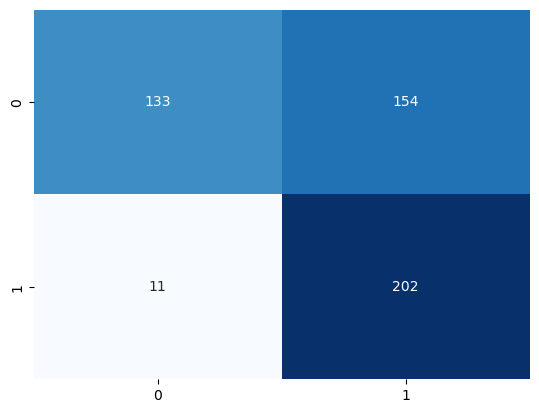

In [27]:
sns.heatmap(confusion_matrix(y_test, classes_pred), annot=True, cbar=False, cmap='Blues', fmt='d');

In [28]:
accuracy_score(y_test, classes_pred)

0.67

In [29]:
print(classification_report(y_test, classes_pred))

              precision    recall  f1-score   support

           0       0.92      0.46      0.62       287
           1       0.57      0.95      0.71       213

    accuracy                           0.67       500
   macro avg       0.75      0.71      0.66       500
weighted avg       0.77      0.67      0.66       500



## **2. Application à un problème multi-classes**

On va utiliser des données sur le vin disponibles sur le site UCI. Le but est de classifier 3 vignerons d'une même région à partir des caractéristiques des vins qu'ils produisent.

### **2.1 Les données**

1. Récupérer les données WINE [ici](https://archive.ics.uci.edu/ml/datasets/wine). Si vous voulez automatiser la récupération, c'est toujours un bon exo donc allez-y mais c'est pas l'objet du tp donc perdez pas trop de temps là-dessus. Les mettre dans un dataframe tout beau tout propre.

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import confusion_matrix, classification_report

In [31]:
column_names = ["cultivars","alcohol","malic","ash","alcalinity",
            "magnesium","tot_phenols","flavonoids","nonf_phenols",
            "proanth","color","hue","od280","proline"]

In [32]:
wine = pd.read_csv('data/wine.data', header=None, names=column_names)
wine

,cultivars,alcohol,malic,ash,alcalinity,magnesium,tot_phenols,flavonoids,nonf_phenols,proanth,color,hue,od280,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


2. Quelques étapes usuelles avant d'aller plus loin : y a quoi dans le dataset, quelle est la variable d'intérêt, quelques stats descriptives, visualisations, etc...  

In [33]:
wine.describe()

,cultivars,alcohol,malic,ash,alcalinity,magnesium,tot_phenols,flavonoids,nonf_phenols,proanth,color,hue,od280,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [34]:
wine.value_counts('cultivars')

cultivars
2    71
1    59
3    48
dtype: int64

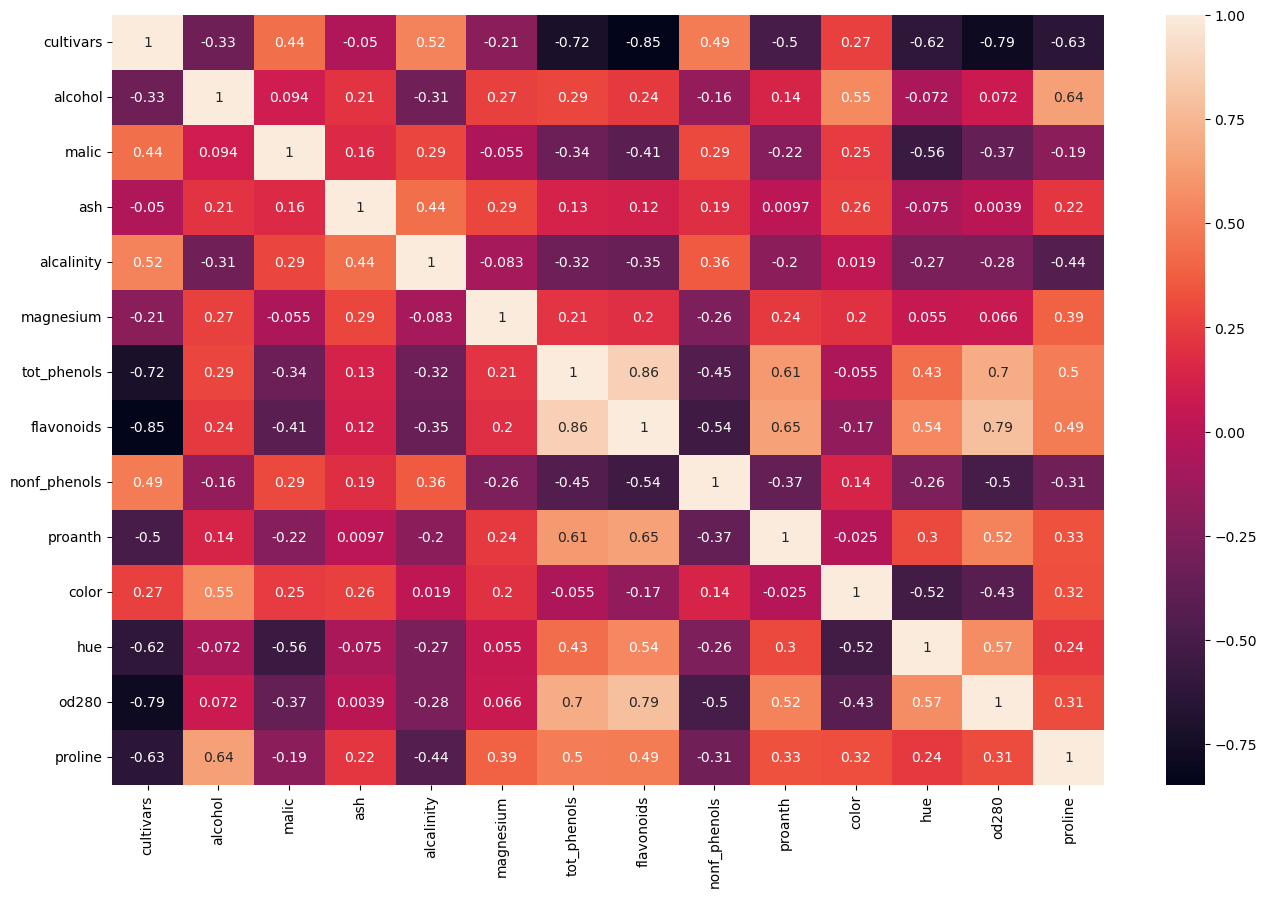

In [35]:
plt.figure(figsize=(16,10))
sns.heatmap(wine.corr(), annot=True);

### **2.2 Preprocessing**

1. Keras  ne  sait  pas  manipuler  directement  une  variable multi-classe. Il faut la transformer en une série d’indicatrices. À vous de jouer (il y a une méthode `to_categorical` quelque part)

In [36]:
X =  wine.drop('cultivars', axis=1)
y = wine.cultivars
y = to_categorical(y-1)
np.sum(y, axis=0)

array([59., 71., 48.], dtype=float32)

2. Découpage en échantillons train et test (avec 40 observations dans le test)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=40)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((138, 13), (40, 13), (138, 3), (40, 3))

3. Les réseaux de neurones étant très dépendant des échelles des différentes variables, il faut standardiser les données avec un StandardScaler.  
Vérifier les moyennes et écart-types des variables après transformation. Qu'est-ce que vous devez avoir ?

In [38]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
np.mean(X_train, axis=0), np.mean(X_test, axis=0)

(array([-1.84071759e-15, -6.11427173e-17, -2.12390492e-16,  2.63879096e-16,
         1.80210114e-16,  1.54465812e-16,  7.72329061e-17, -4.50525285e-16,
         5.79246795e-17, -3.52375134e-16, -1.79405605e-16,  2.57443020e-16,
        -4.34435097e-17]),
 array([ 0.14337075, -0.08035403,  0.05485319, -0.18936859, -0.09668015,
        -0.07952566, -0.03498271,  0.29044986,  0.05804729,  0.05619203,
        -0.09157176, -0.18967099, -0.00480648]))

In [40]:
np.std(X_train, axis=0), np.std(X_test, axis=0)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1.07085064, 0.93579161, 0.960656  , 0.85777831, 1.00033686,
        1.03967378, 1.03958964, 1.17440853, 0.9697993 , 1.07753536,
        0.99179804, 0.87165981, 0.91070105]))

### **2.3 Modélisation et évaluation**

1. Construire et entraîner un perceptron simple adapté au problème

In [41]:
m1 = Sequential()
m1.add(Dense(input_dim=13, units=3, activation='sigmoid'))
m1.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
m1.fit(X_train, y_train, batch_size=16, epochs=120)

Epoch 1/120
9/9 [==============================] - 0s 2ms/step - loss: 1.4415 - accuracy: 0.3406
Epoch 2/120
9/9 [==============================] - 0s 2ms/step - loss: 1.3876 - accuracy: 0.3696
Epoch 3/120
9/9 [==============================] - 0s 2ms/step - loss: 1.3357 - accuracy: 0.3841
Epoch 4/120
9/9 [==============================] - 0s 1ms/step - loss: 1.2871 - accuracy: 0.3986
Epoch 5/120
9/9 [==============================] - 0s 1ms/step - loss: 1.2402 - accuracy: 0.4058
Epoch 6/120
9/9 [==============================] - 0s 1ms/step - loss: 1.1972 - accuracy: 0.4348
Epoch 7/120
9/9 [==============================] - 0s 1ms/step - loss: 1.1558 - accuracy: 0.4710
Epoch 8/120
9/9 [==============================] - 0s 1ms/step - loss: 1.1168 - accuracy: 0.4855
Epoch 9/120
9/9 [==============================] - 0s 1ms/step - loss: 1.0793 - accuracy: 0.5145
Epoch 10/120
9/9 [==============================] - 0s 1ms/step - loss: 1.0448 - accuracy: 0.5435
Epoch 11/120
9/9 [===========

2. Évaluer le modèle

In [42]:
m1.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.1328 - accuracy: 0.9750


[0.13280214369297028, 0.9750000238418579]

In [43]:
m1.predict(X_test)

2/2 [==============================] - 0s 2ms/step


array([[0.18925388, 0.512797  , 0.98779494],
       [0.39956003, 0.92762476, 0.336364  ],
       [0.3451732 , 0.2903622 , 0.99199885],
       [0.95600027, 0.07701661, 0.02838188],
       [0.31525508, 0.9182556 , 0.8093557 ],
       [0.19485746, 0.97907186, 0.6786634 ],
       [0.32410237, 0.34134638, 0.9886717 ],
       [0.1563478 , 0.95090055, 0.40140775],
       [0.7369908 , 0.51401675, 0.04431595],
       [0.7590086 , 0.12760708, 0.0174893 ],
       [0.3453829 , 0.7661404 , 0.9688911 ],
       [0.7363892 , 0.13297318, 0.01987822],
       [0.07207558, 0.90845627, 0.19540036],
       [0.58939487, 0.73291993, 0.01436916],
       [0.36567938, 0.15154268, 0.98156804],
       [0.19528522, 0.42278028, 0.75590366],
       [0.2792624 , 0.8435799 , 0.2600427 ],
       [0.19122332, 0.7779794 , 0.01544615],
       [0.12145401, 0.95397127, 0.70090616],
       [0.283933  , 0.9729759 , 0.25648597],
       [0.95384645, 0.9274919 , 0.5289888 ],
       [0.32003647, 0.7816899 , 0.959173  ],
       [0.

In [44]:
y_true = np.argmax(y_test, axis=1)

In [45]:
y_pred = np.argmax(m1.predict(X_test), axis=1)

2/2 [==============================] - 0s 2ms/step


[[14  0  0]
 [ 0 14  1]
 [ 0  0 11]]


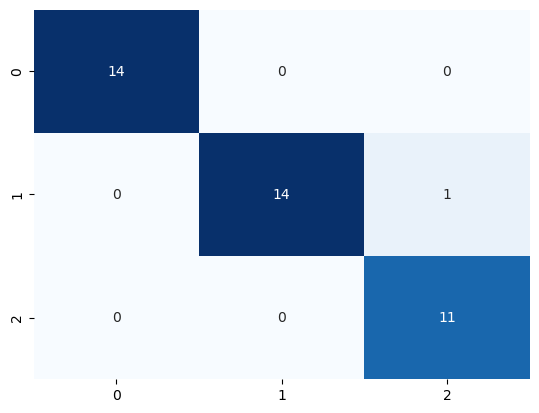

In [46]:
print(confusion_matrix(y_true, y_pred))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cbar=False, cmap='Blues', fmt='d');

In [47]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.97        15
           2       0.92      1.00      0.96        11

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



3. Essayer d'améliorer votre modèle en ajoutant une couche cachée. Quel problème se pose lorsqu'on ajoute trop de couches ?

In [48]:
m2 = Sequential()
m2.add(Dense(input_dim=13, units=12, activation='relu'))
m2.add(Dense(units=8, activation='relu'))
m2.add(Dense(units=3, activation='sigmoid'))
m2.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
m2.fit(X_train, y_train, batch_size=16, epochs=120)

Epoch 1/120
9/9 [==============================] - 0s 1ms/step - loss: 1.3279 - accuracy: 0.1812
Epoch 2/120
9/9 [==============================] - 0s 1ms/step - loss: 1.2521 - accuracy: 0.1957
Epoch 3/120
9/9 [==============================] - 0s 2ms/step - loss: 1.1889 - accuracy: 0.2536
Epoch 4/120
9/9 [==============================] - 0s 1ms/step - loss: 1.1320 - accuracy: 0.2899
Epoch 5/120
9/9 [==============================] - 0s 1ms/step - loss: 1.0860 - accuracy: 0.3478
Epoch 6/120
9/9 [==============================] - 0s 1ms/step - loss: 1.0446 - accuracy: 0.4058
Epoch 7/120
9/9 [==============================] - 0s 1ms/step - loss: 1.0075 - accuracy: 0.4130
Epoch 8/120
9/9 [==============================] - 0s 1ms/step - loss: 0.9751 - accuracy: 0.4420
Epoch 9/120
9/9 [==============================] - 0s 2ms/step - loss: 0.9456 - accuracy: 0.4638
Epoch 10/120
9/9 [==============================] - 0s 1ms/step - loss: 0.9155 - accuracy: 0.5290
Epoch 11/120
9/9 [===========

In [49]:
m2.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.1381 - accuracy: 0.9750


[0.13810847699642181, 0.9750000238418579]